# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [50]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import missingno as msno
from datetime import datetime
from scipy import stats
import xgboost as xgb
# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [51]:
train_data = pd.read_csv('df_train.csv') # load the train data
test_data = pd.read_csv('df_test.csv')   # load the test data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [52]:
 # overview of train_data columns
train_data.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [53]:
 # overview dataset information for train_data
train_data.info

<bound method DataFrame.info of       Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0              0  2015-01-01 03:00:00           0.666667           level_5   
1              1  2015-01-01 06:00:00           0.333333          level_10   
2              2  2015-01-01 09:00:00           1.000000           level_9   
3              3  2015-01-01 12:00:00           1.000000           level_8   
4              4  2015-01-01 15:00:00           1.000000           level_7   
...          ...                  ...                ...               ...   
8758        8758  2017-12-31 09:00:00           1.000000           level_6   
8759        8759  2017-12-31 12:00:00           5.000000           level_6   
8760        8760  2017-12-31 15:00:00           6.333333           level_9   
8761        8761  2017-12-31 18:00:00           7.333333           level_8   
8762        8762  2017-12-31 21:00:00           4.333333           level_9   

      Bilbao_rain_1h  Valencia_

In [54]:
# the shape of train_data 
train_data.shape  

(8763, 49)

In [55]:
# Read data
train_data.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


#### Looking at our data : <br>
we noticed that it is not possible to view hidden columns,because of the shape of the data,
hence we cannot determine the hidden features. Thereforewe will use the transpose method(swapping rows and columns). To know more about the transpose method  [link text](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html)

In [56]:
#Read the train data in Transpose
"""
The addition of the *T* (transpose)tranforms our data by changing the columns and rows """
train_data.head(10).T 

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00,2015-01-01 18:00:00,2015-01-01 21:00:00,2015-01-02 00:00:00,2015-01-02 03:00:00,2015-01-02 06:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7,level_7,level_8,level_9,level_9,level_9
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.333333
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0,69.666667,83.666667,83.666667,86.0,87.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0,67.333333,63.333333,64.0,63.333333,63.666667
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0,12.333333,16.333333,8.666667,5.333333,15.333333
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333,0.666667,1.0,1.333333,1.0,1.0


In [57]:
#checking the shape of the data
train_data.shape

(8763, 49)

#### Observations: 
After the transpose method we realize that there are 49 columns and 8763 rows, we have an unnamed 0 column, Valencia_wind_deg and Seville_pressure columns show category values,they are object's and they require to be converted to numerical values

In [58]:
#checking for possible missing values
train_data.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

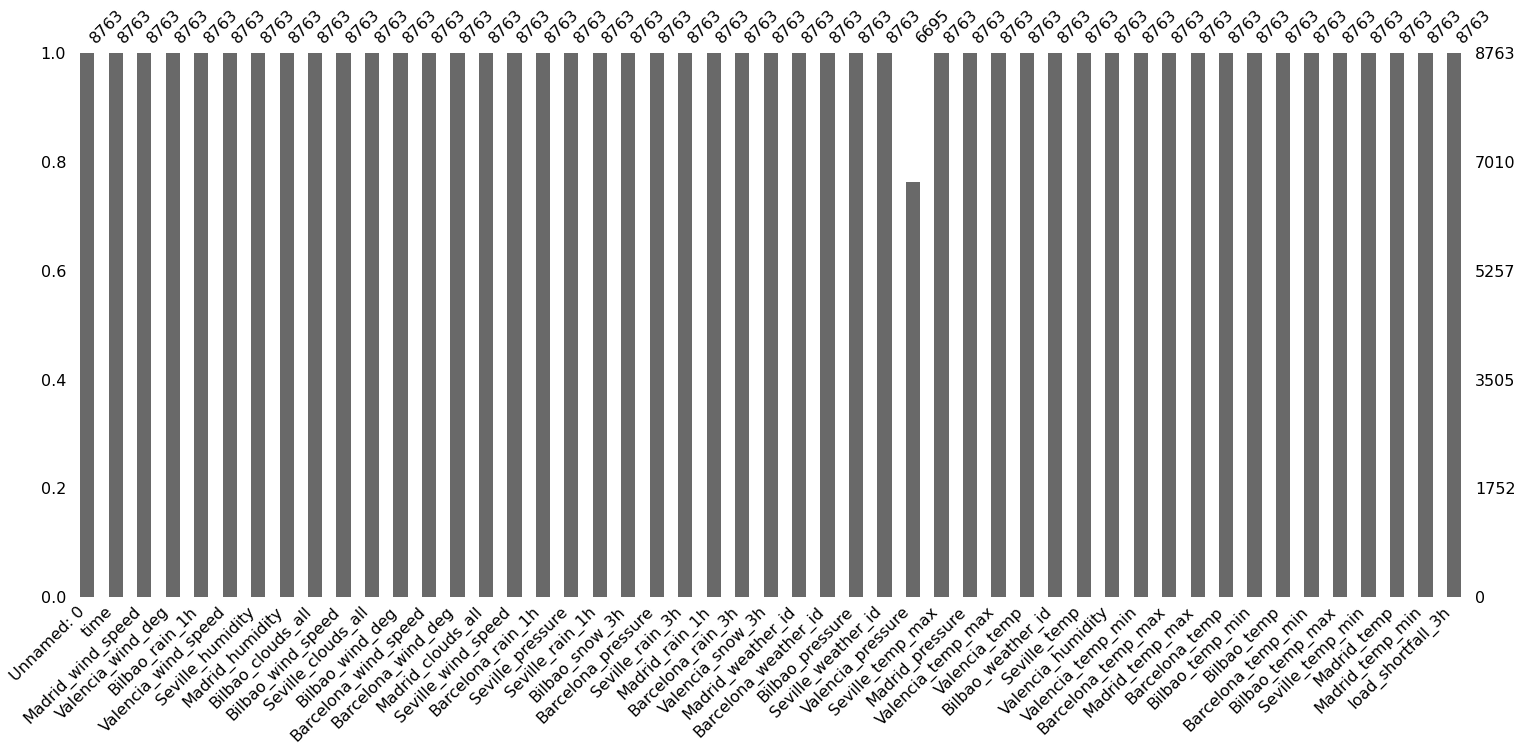

In [59]:
#visualizing null values
msno.bar(train_data)
plt.show()

In [60]:
#checking the data type of each column in the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Valencia_pressure has 6695 non-null values which is less than 8763 indicating that it has missing values, We hope to fill up these missing values using either mode,mean or median in the featutre engineering section of the notebook. The datatype 'object' indicates that the columns time, Valencia wind deg, and Seville pressure are non-numeric.

In [61]:
# look at data statistics
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8763.0,4381.000000,2529.804538,0.000000,2190.500000,4381.000000,6571.500000,8.762000e+03
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02


Looking at the data we observe that: From the mean column, we can see some values which are far from the range e.g Bilbao_wind_deg,Valencia_pressure,Bilbao_pressure which tells us that the maximum value would interfare with how our outliers are going to look like

C:\Users\babym\AppData\Local\Temp\ipykernel_9120\1821711472.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.kurtosis().plot()


<AxesSubplot:>

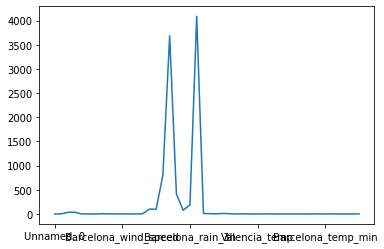

In [62]:
 #Checking the skewness
train_data.kurtosis().plot()

In [63]:
#Checking for outliers in the different columns
train_data.kurtosis()

C:\Users\babym\AppData\Local\Temp\ipykernel_9120\3823169817.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_data.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

#### Kurtosis (Ku) is a measure of relative peakedness of a distribution.
* It is a shape parameter that characterizes the degree of peakedness. A distribution is said to be leptokurtic when the degree of peakedness is greater than > 3.
* These are the features with large numbers of outliers as shown by Kurtosis > 3; __Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h,Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id__. 
* The outliers observed in Barcelona_pressure are definitely due to some sort of error, as a pressure of 3687.564230 is too high. The maximum pressure recorded in history is 1084, and the maximum pressure for the other cities in the dataset are also below this value.
* The outliers in the other features can maybe be attributed to a significant change in weather conditions on the day that the * This value can be replaced or dropped during data engineering.
* Valencia_wind_speed has a maximum of 52, there is also something wrong with that value. The highest wind speed recorded in history is 20.This value should also be replaced or dropped.
* The outliers in the other features can maybe be attributed to a significant change in weather conditions on the day that the data was collected and hence we can leave them. 


c:\Users\babym\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_pressure'>

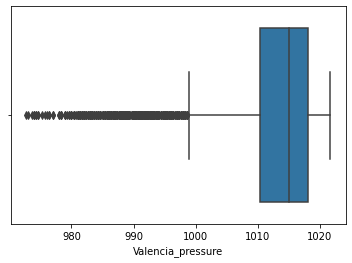

In [64]:
sns.boxplot(train_data['Valencia_pressure'])

In [65]:
print('Mean')
print(train_data['Valencia_pressure'].mean())
print('Median')
print(train_data['Valencia_pressure'].median())
print('Mode')
print(train_data['Valencia_pressure'].mode())

Mean
1012.0514065222798
Median
1015.0
Mode
0    1018.0
Name: Valencia_pressure, dtype: float64


## The Distribution of our Target variable Data

c:\Users\babym\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='load_shortfall_3h', ylabel='Density'>

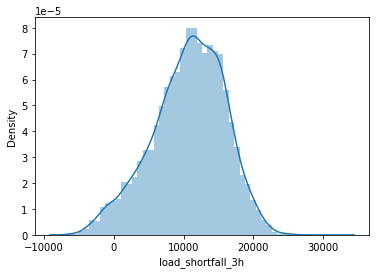

In [66]:
# target variable distribution
sns.distplot(train_data['load_shortfall_3h'],kde=True)

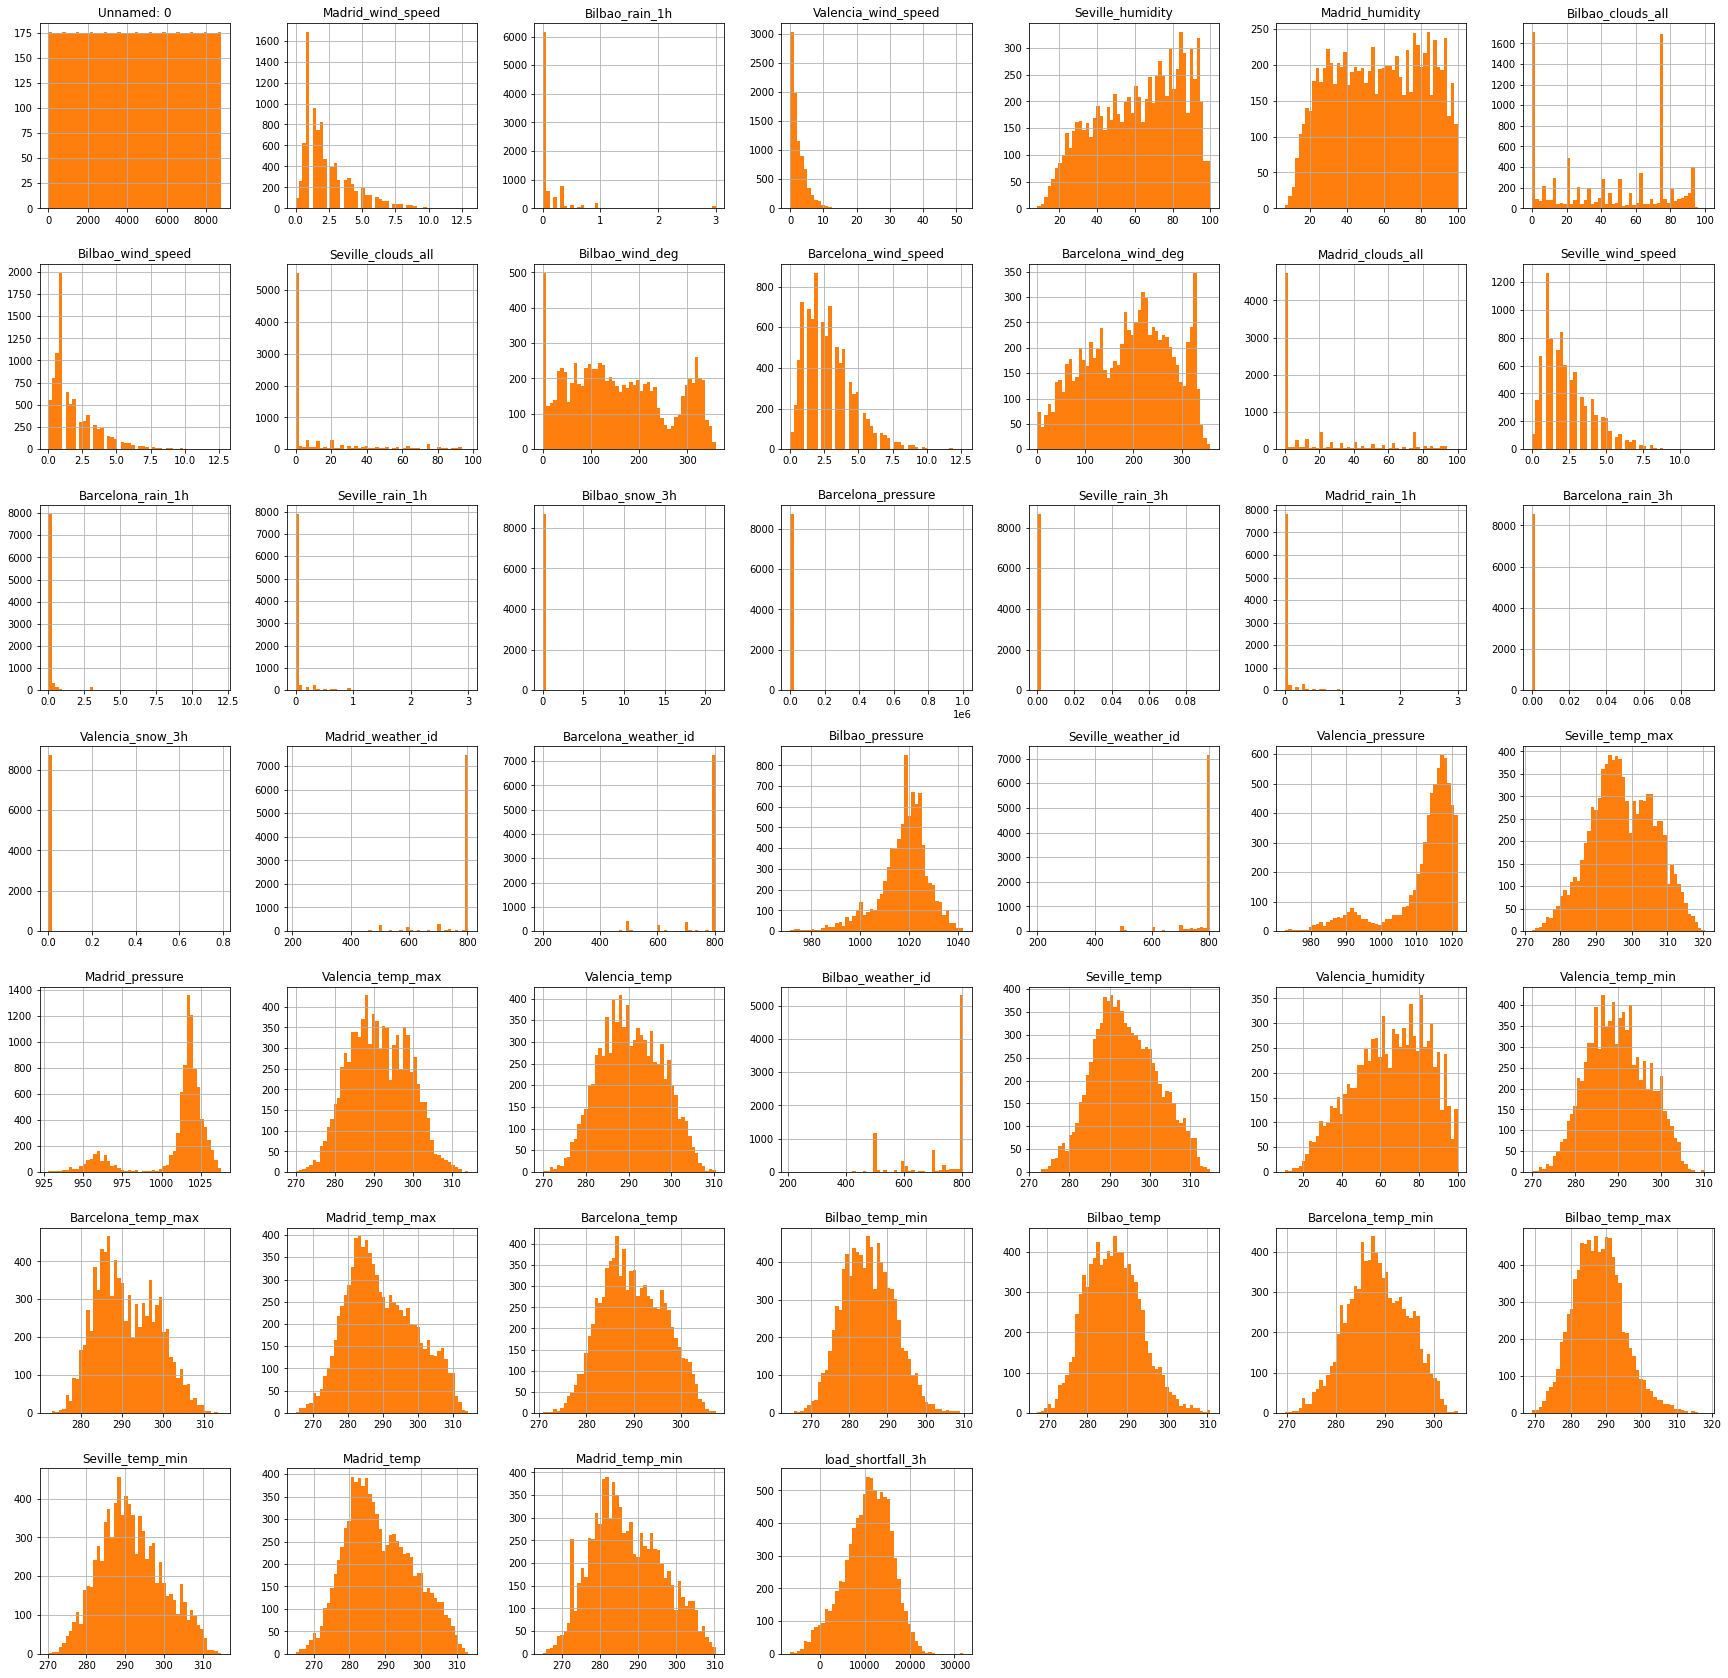

In [67]:
# plotting distributions of all the features in train
train_data.hist(bins=50, figsize=(30,30), color = 'tab:orange')
plt.show()

<AxesSubplot:>

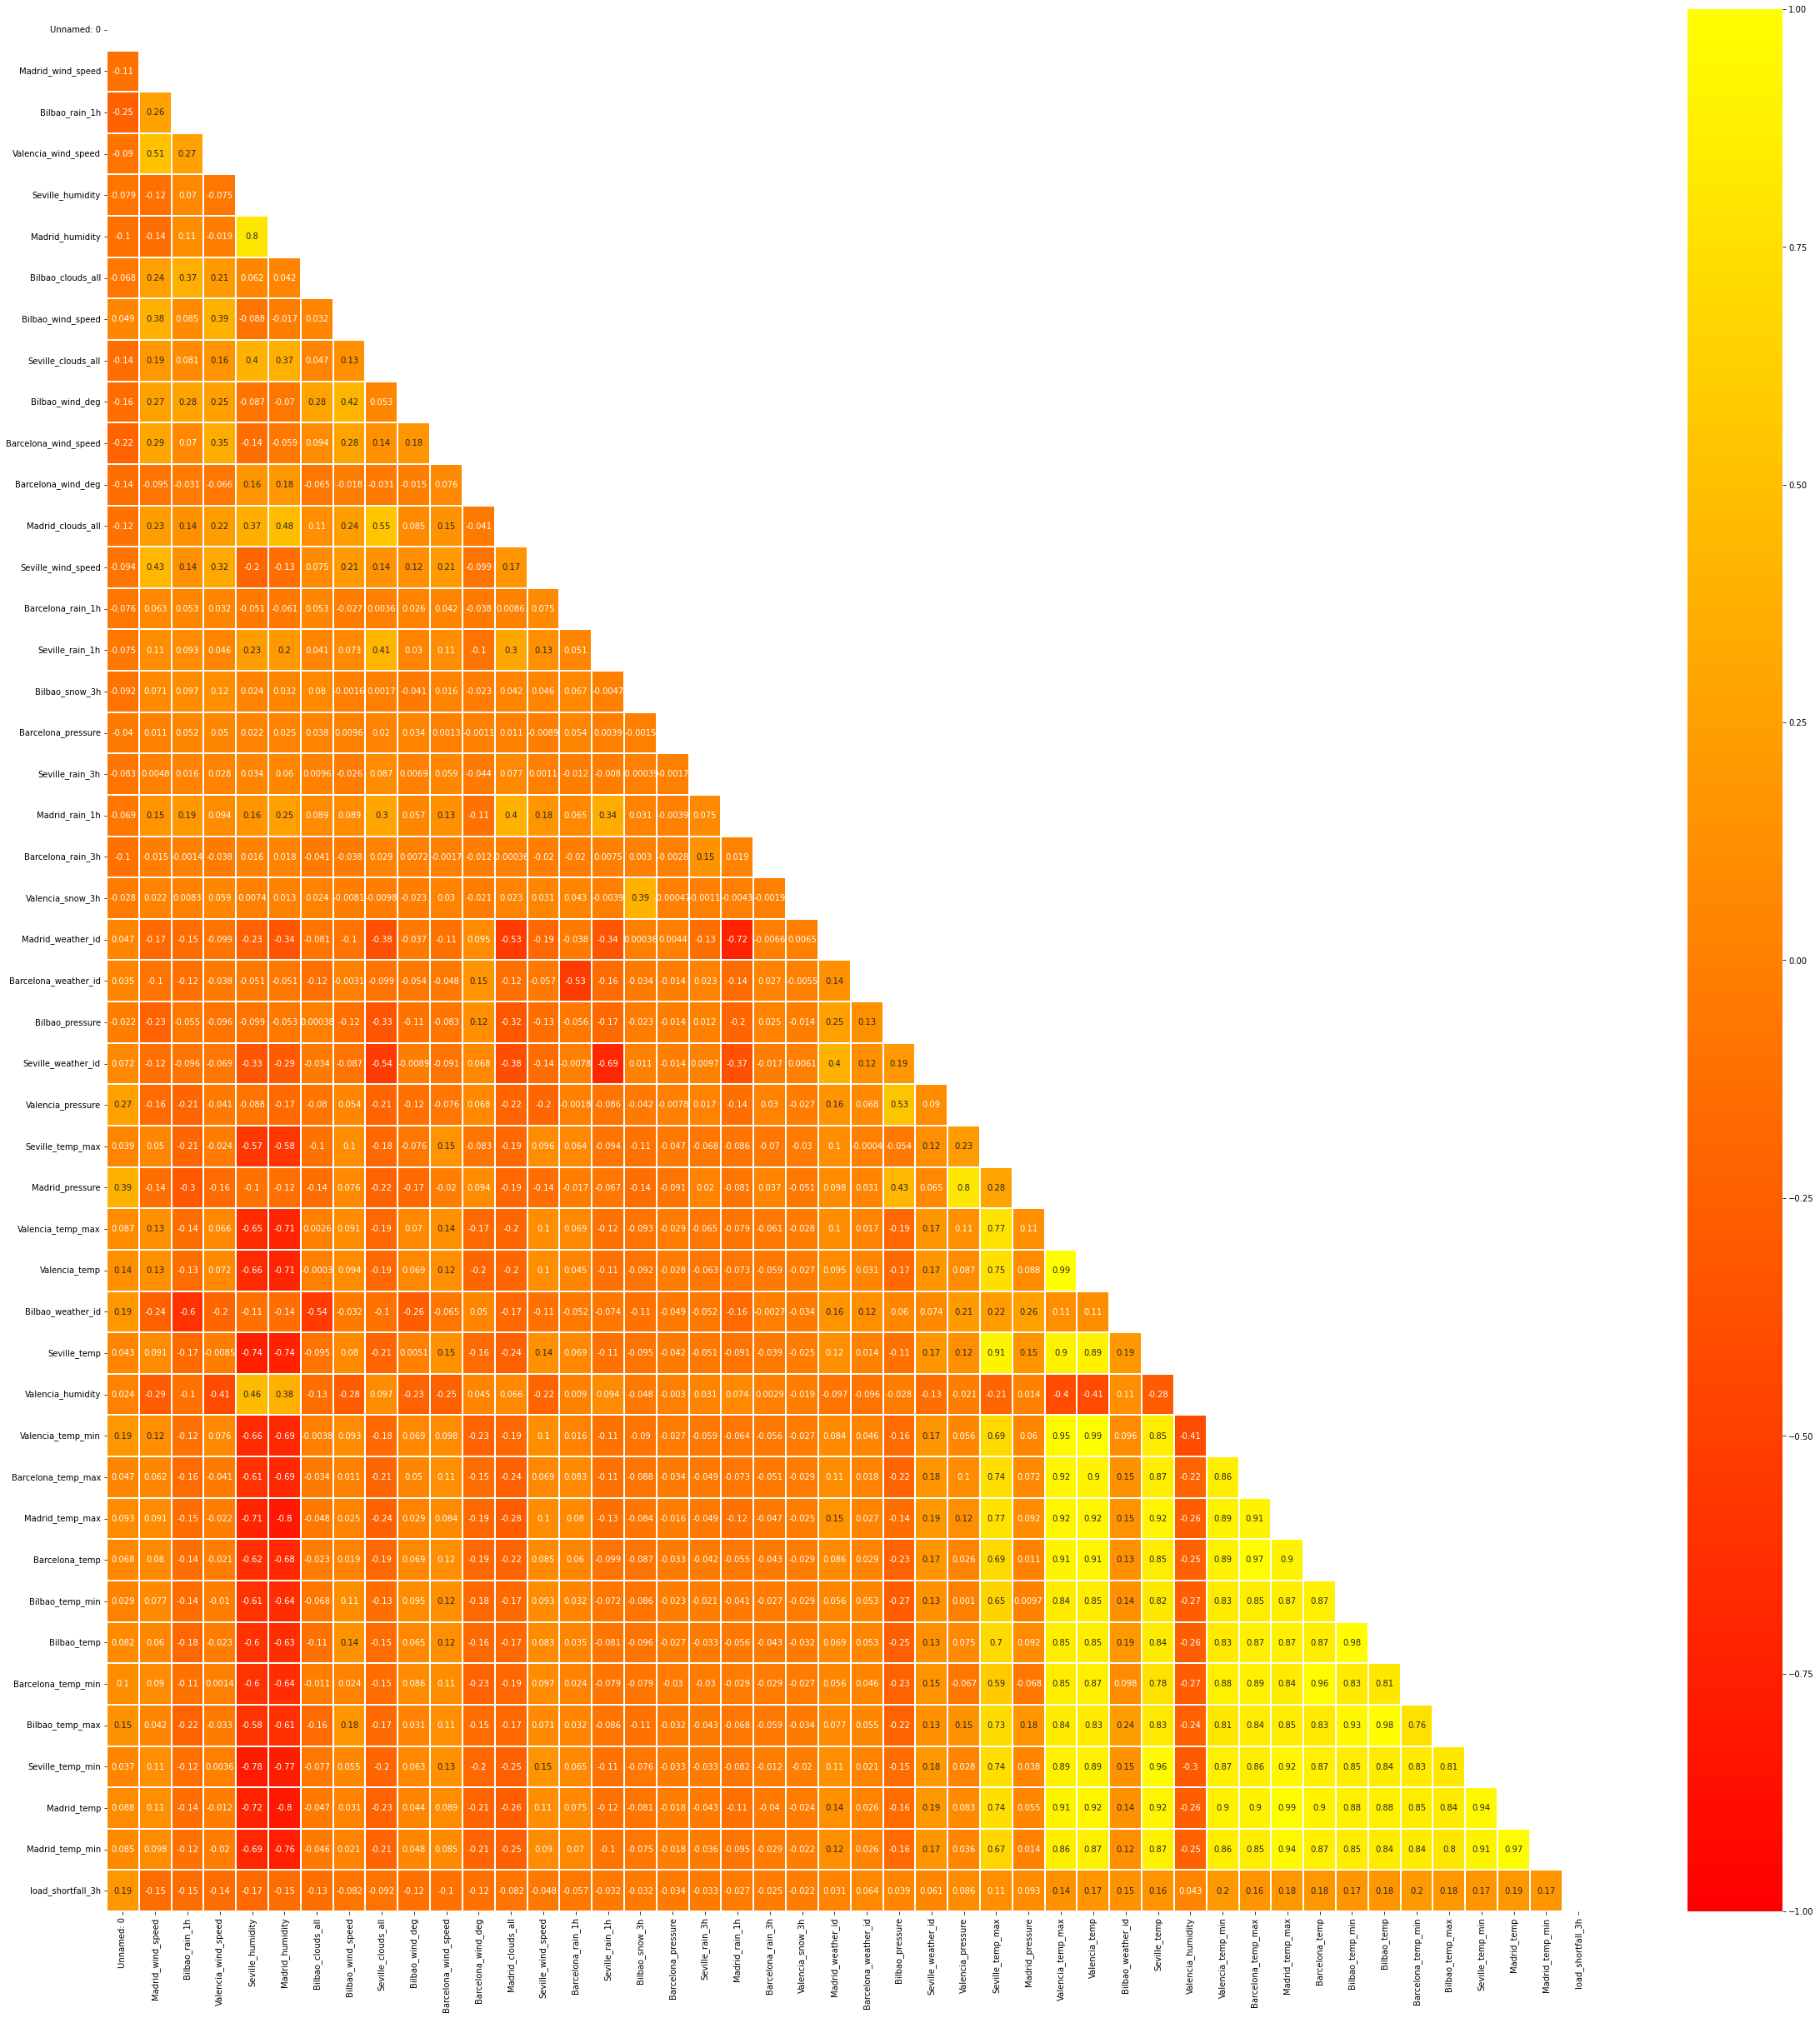

In [68]:
#correlation plot heatmap
train_corr=train_data.corr().T
plt.figure(figsize=(40,42))

# Mask top half of matrix as it contains redunant info
mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train_corr,annot=True, vmin=-1, vmax=1, cmap='autumn', linewidth=0.1, mask= mask)




In [69]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

We will be carrying out Feature Engineering in this section of our notebook. 

We have highlighted some key points to consider - 
   * Feature Engineering in data science
   * Handling missing values
   * Handling outliers
   * Feature selection
   * Redundant/constant columns 
   

Feature selection will help us choose the most relevant variable, in this project we have used Correlection to help use select features that are highly correleted to the target variable(have a relationship with the target), help with removing variables looking at their relationship with the target.

In [70]:
# remove missing values/ features
train_data['Valencia_pressure'] = train_data['Valencia_pressure'].fillna(train_data['Valencia_pressure'].mode()[0])

#train_data=train_data.dropna()

In [71]:
#Impute Categirical features using OrdinalEncoder()
enc = OrdinalEncoder()

train_data.Valencia_wind_deg = enc.fit_transform(train_data[['Valencia_wind_deg']])
train_data.Seville_pressure = enc.fit_transform(train_data[['Seville_pressure']])

test_data.Valencia_wind_deg = enc.fit_transform(test_data[['Valencia_wind_deg']])
test_data.Seville_pressure = enc.fit_transform(test_data[['Seville_pressure']])

In [72]:
#outliers 
def drop_numerical_outliers(train_data, z_thresh = 3):
    #constrains will contain 'True'or 'False' depending on if it is a value below the threshold
    constrains = train_data.select_dtypes(include = [np.number])\
    .apply(lambda x: np.abs(stats.zscore(x))< z_thresh, reduce = False)\
    .all(axis = 1)
    #Drop (inplace)values set to be rejected
    train_data.drop(train_data.index[~constrains], inplace=True)
    return drop_numerical_outliers(train_data)

In [73]:
# create new features


train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])
df_test_copy = test_data.copy()


# day
train_data['Day'] = train_data['time'].dt.day
test_data['Day'] = test_data['time'].dt.day

# month
train_data['Month'] = train_data['time'].dt.month
test_data['Month'] = test_data['time'].dt.month

# year
train_data['Year'] = train_data['time'].dt.year
test_data['Year'] = test_data['time'].dt.year

# hour
train_data['Start_hour'] = train_data['time'].dt.hour
test_data['Start_hour'] = test_data['time'].dt.hour

# Drop Feature
train_data.drop(['time'] , axis=1 , inplace=True)
test_data.drop(['time'] , axis=1 , inplace=True)

In [74]:
columns = train_data.drop(['load_shortfall_3h'] , axis=1).columns

In [75]:
test_data.head()

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,Day,Month,Year,Start_hour
0,8763,5.000000,8.0,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000,1,1,2018,0
1,8764,4.666667,8.0,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000,1,1,2018,3
2,8765,2.333333,7.0,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000,1,1,2018,6
3,8766,2.666667,7.0,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333,1,1,2018,9
4,8767,4.000000,7.0,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000,1,1,2018,12


In [76]:
# engineer existing features

#Scale the dataset
"""this is so that the model understands the problem"""
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_data.drop(['load_shortfall_3h'] , axis=1).values)
scaled_features_test = scaler.fit_transform(test_data.values)


train_scaled = pd.DataFrame(scaled_features, index=train_data.index, columns=columns)
test_scaled = pd.DataFrame(scaled_features_test, index=test_data.index , columns=columns)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [77]:
# create targets and features dataset
x=train_scaled['load_shortfall_3h'] = train_data.load_shortfall_3h.values

In [78]:
#will remove zero varaince features

from sklearn.feature_selection import VarianceThreshold
Var_thres = VarianceThreshold(threshold = 0)
Var_thres.fit(train_data)

VarianceThreshold(threshold=0)

In [79]:
constant_columns_thrs = [column for column in train_data.columns
                   if column not in train_data.columns[Var_thres.get_support()]]
print (len(constant_columns_thrs))

0


In [80]:
for feature in constant_columns_thrs:
    print(feature)

In [81]:
# split data
X = train_scaled.drop(['load_shortfall_3h'], axis=1)
y = train_scaled.load_shortfall_3h
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [82]:
#drop the constant columns

#X_train.drop(constant_columns_thrs, axis=1)

# Correlation and Variable selection

<AxesSubplot:>

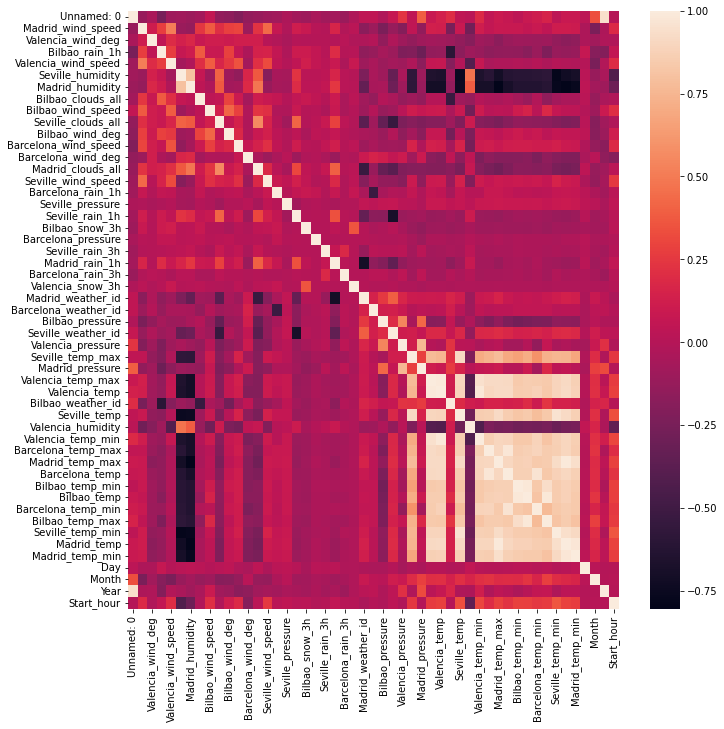

In [83]:
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [84]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [85]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

13

In [86]:
corr_features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min',
 'Year'}

In [87]:
X_train.drop(corr_features,axis=1)

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Bilbao_weather_id,Valencia_humidity,Bilbao_temp_min,Day,Month,Start_hour
1567,-1.112402,-0.590400,-0.805713,-0.362123,-0.519665,-1.989048,-1.249885,0.968714,0.677940,-0.565065,...,0.254657,1.840741,0.301076,2.099875,0.675740,-1.016605,1.599537,0.029534,0.137822,0.218449
614,-1.489133,0.670681,-0.805713,0.438134,1.830623,0.796106,1.229498,0.733174,-1.091146,1.948212,...,0.254657,-1.401363,0.210975,-1.083270,-1.939939,1.579284,-0.477794,0.370514,-1.022345,-0.218001
1871,-0.992228,2.832533,1.303146,-0.362123,1.139362,-1.443806,-0.688257,-0.106581,-0.698016,-0.015715,...,-0.513039,2.291430,0.105857,1.772061,0.667107,-1.881902,1.361914,0.825154,0.427864,0.218449
49,-1.712483,-0.770554,1.303146,-0.362123,-0.657917,0.855051,0.613077,-1.335491,-0.501451,-0.565065,...,-0.129191,-1.492245,-0.735086,-0.945015,0.649842,0.489010,-0.699526,-0.993407,-1.602429,0.218449
5826,0.571223,-0.770554,0.248717,-0.362123,-0.381412,0.516117,1.092516,0.968714,-0.894581,-0.565065,...,0.523351,-0.262473,1.051919,-1.390642,0.439782,1.042800,-1.919078,1.507115,1.588031,1.527799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8262,1.534198,-0.770554,-0.454236,-0.362123,-0.381412,1.370821,-0.017043,0.968714,-0.304886,2.731037,...,0.484966,-1.051178,0.436228,-0.333176,0.675740,-0.220533,-0.030022,1.620775,1.007947,-0.218001
6214,0.724603,-0.770554,-1.157189,-0.362123,-0.657917,0.501381,1.174705,0.016310,-0.501451,0.753376,...,-1.088812,-1.469305,-1.771249,-1.262116,0.667107,1.337001,-0.779828,0.029534,-1.312387,-0.218001
8324,1.558707,-0.950708,-1.157189,-0.362123,0.724605,0.663480,1.174705,0.917510,-0.501451,-0.565065,...,0.446581,-1.576982,0.451245,-1.038153,-0.089684,-0.999299,-1.173398,-0.993407,1.297989,-1.090901
6253,0.740020,-0.770554,-1.157189,-0.362123,-0.657917,0.589799,1.133610,1.368110,-0.501451,-0.565065,...,-2.010047,-1.702198,-2.086603,-2.602717,0.684372,0.402481,-0.823376,0.597834,-1.312387,-0.654451


In [88]:
# Train and test set are converted to DMatrix objects
data_dmatrix = xgb.DMatrix(data=X,label=y)

#### Using The Linear Regression model

In [89]:
#Instantiate the model
lm = LinearRegression()
#Fit the model into training set
lm.fit(X_train, y_train)

#predict on unseen data
predict = lm.predict(X_test)
train_predict = lm.predict(X_train) #predicting on the same training set

#### Using The Lasso Regression

In [90]:
# Create LASSO model object, setting alpha to 0.01
""" when alpha is 0, Lasso regression produces the same coefficients as a linear regression.
When alpha is very very large, all coefficients are zero."""
lasso = Lasso(alpha=0.01)

In [91]:
# Train the LASSO model
lasso.fit(X_train, y_train)
# Get predictions
lasso_pred = lasso.predict(X_test)

c:\Users\babym\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.739e+10, tolerance: 1.886e+07
  model = cd_fast.enet_coordinate_descent(


#### Using Decision Tree

In [92]:
Reg_tree = DecisionTreeRegressor(random_state=42)

In [93]:
# Fitting the model
Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)

#### Ridge regression

In [94]:
# Creating Ridge model
Ridge = Ridge()

In [95]:
# Train the model
Ridge.fit(X_train, y_train)
# Get predictions
Ridge_pred = Ridge.predict(X_test)

In [96]:
#RF = RandomForestRegressor(n_estimators=100, max_depth=8)

#### Using Random forest Regressor

In [97]:
#recursive feature selection
from sklearn.feature_selection import RFE
RF = RFE(RandomForestRegressor(n_estimators=100 , random_state=0 , n_jobs=1), n_features_to_select=14)

In [98]:
# Fitting the model
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)

In [ ]:
RF.get_support()

array([ True,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False,  True, False, False,
       False, False,  True,  True, False,  True])

In [ ]:
X_train.columns[RF.get_support()]

Index(['Unnamed: 0', 'Madrid_wind_speed', 'Seville_humidity',
       'Bilbao_wind_deg', 'Barcelona_wind_deg', 'Barcelona_pressure',
       'Bilbao_pressure', 'Valencia_humidity', 'Valencia_temp_min',
       'Madrid_temp_max', 'Barcelona_temp_min', 'Day', 'Month', 'Start_hour'],
      dtype='object')

In [ ]:
# Instantiate support vector regression model
Sv_reg = SVR(kernel='rbf', gamma='auto')

In [ ]:
# Train the model
Sv_reg.fit(X_train,y_train)
# Get predictions
SV_pred = Sv_reg.predict(X_test)

In [ ]:
#Best Selected features
constant_columns = [column for column in X_train.columns
                   if column not in X_train.columns[RF.get_support()]]
print (len(constant_columns))

37


In [ ]:
for feature in constant_columns:
    print(feature)

Valencia_wind_deg
Bilbao_rain_1h
Valencia_wind_speed
Madrid_humidity
Bilbao_clouds_all
Bilbao_wind_speed
Seville_clouds_all
Barcelona_wind_speed
Madrid_clouds_all
Seville_wind_speed
Barcelona_rain_1h
Seville_pressure
Seville_rain_1h
Bilbao_snow_3h
Seville_rain_3h
Madrid_rain_1h
Barcelona_rain_3h
Valencia_snow_3h
Madrid_weather_id
Barcelona_weather_id
Seville_weather_id
Valencia_pressure
Seville_temp_max
Madrid_pressure
Valencia_temp_max
Valencia_temp
Bilbao_weather_id
Seville_temp
Barcelona_temp_max
Barcelona_temp
Bilbao_temp_min
Bilbao_temp
Bilbao_temp_max
Seville_temp_min
Madrid_temp
Madrid_temp_min
Year


In [ ]:
#drop the constant columns

X_train.drop(constant_columns, axis=1)

,Unnamed: 0,Madrid_wind_speed,Seville_humidity,Bilbao_wind_deg,Barcelona_wind_deg,Barcelona_pressure,Bilbao_pressure,Valencia_humidity,Valencia_temp_min,Madrid_temp_max,Barcelona_temp_min,Day,Month,Start_hour
1567,-1.112402,-0.590400,-1.989048,0.598160,-0.305499,-0.025722,-0.272713,-1.016605,1.950051,1.870793,1.346921,0.029534,0.137822,0.218449
614,-1.489133,0.670681,0.796106,0.209463,-1.506771,-0.025509,0.291385,1.579284,-0.973741,-0.815087,-0.354129,0.370514,-1.022345,-0.218001
1871,-0.992228,2.832533,-1.443806,-1.198337,0.106151,-0.026290,-0.903174,-1.881902,1.279718,0.776944,1.104934,0.825154,0.427864,0.218449
49,-1.712483,-0.770554,0.855051,0.483837,0.727370,-0.024845,1.320032,0.489010,-0.822310,-0.900937,-0.470052,-0.993407,-1.602429,0.218449
5826,0.571223,-0.770554,0.516117,-1.133010,0.210935,-0.024395,1.817765,1.042800,-1.310405,-1.338972,-1.687481,1.507115,1.588031,1.527799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8262,1.534198,-0.770554,1.370821,0.304188,0.787246,-0.025651,0.523660,-0.220533,-0.152162,-0.245122,-0.212614,1.620775,1.007947,-0.218001
6214,0.724603,-0.770554,0.501381,0.167001,1.879992,-0.024158,-1.566818,1.337001,-1.169631,-1.094839,-0.550359,0.029534,-1.312387,-0.218001
8324,1.558707,-0.950708,0.663480,-0.081243,1.266258,-0.025769,0.556842,-0.999299,-0.924324,-1.168058,-1.851355,-0.993407,1.297989,-1.090901
6253,0.740020,-0.770554,0.589799,0.558963,-1.982041,-0.024798,-1.965004,0.402481,-2.637994,-1.891332,-0.901377,0.597834,-1.312387,-0.654451


In [ ]:
X_train_r = RF.transform(X_train)
X_test_r = RF.transform(X_test)

best_features =  ['Madrid_wind_speed','Madrid_humidity', 'Bilbao_wind_deg','Barcelona_pressure','Seville_temp']

In [ ]:
# create one or more ML models
regression = [
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 0.1,
                        max_depth = 100, alpha = 10, n_estimators = 100),
    
    RandomForestRegressor(max_depth=100)
]

In [ ]:
X = test_scaled[best_features]
X.columns

Index(['Madrid_wind_speed', 'Madrid_humidity', 'Bilbao_wind_deg',
       'Barcelona_pressure', 'Seville_temp'],
      dtype='object')

In [ ]:
for items in regression:
    model = items
    model.fit(X_train[best_features],y_train)
    train_model = model.predict(X_train[best_features])
    test_model = model.predict(X_test[best_features])

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance
model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                         "SVR" : (metrics.mean_absolute_error(y_test,SV_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
model_Performance = pd.DataFrame(data= model_Performance)
model_Performance

,Test RMSE
Decision Tree,4048.329654
Lasso,4777.851251
Linear model,4754.810791
Random Forest,2829.603120
Ridge,4777.500375
SVR,4257.578000


In [ ]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

,Test MSE
Decision Tree,1.638897e+07
Lasso,2.282786e+07
Linear model,2.260823e+07
Random Forest,8.006654e+06
Ridge,2.282451e+07
SVR,2.849986e+07


In [ ]:
y_pred =  model.predict(X)
daf = pd.DataFrame(y_pred, columns=['load_shortfall_3h'])
output = pd.DataFrame({"time": df_test_copy['time'].reset_index(drop=True)})
submissionF = output.join(daf)
submissionF['load_shortfall_3h'] = daf.values
submissionF.to_csv("submissionB.csv", index=False)
print(submissionF)

                    time  load_shortfall_3h
0    2018-01-01 00:00:00        9605.600000
1    2018-01-01 03:00:00        9033.213333
2    2018-01-01 06:00:00       12819.153333
3    2018-01-01 09:00:00        9756.443333
4    2018-01-01 12:00:00        5707.276667
...                  ...                ...
2915 2018-12-31 09:00:00       15570.423333
2916 2018-12-31 12:00:00        9592.240000
2917 2018-12-31 15:00:00       10919.426667
2918 2018-12-31 18:00:00       12147.220000
2919 2018-12-31 21:00:00       12372.173333

[2920 rows x 2 columns]


In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic